# Student Do: Out of Sorts

### Import Libraries and Dependencies

In [44]:
import csv
from pathlib import Path
import pandas as pd
# from decimal import *

### Read CSV as Pandas DataFrame

In [18]:
# Read in csv
stockData = pd.read_csv('../Resources/bb_stock_data.csv', parse_dates=True, index_col='Date', infer_datetime_format=True)
stockData

,Close
Date,
2019-01-02,9.64
2019-01-03,9.29
2019-01-04,9.67
2019-01-07,9.88
2019-01-08,9.82
...,...
2019-12-20,8.57
2019-12-23,8.53
2019-12-24,8.37


### Index Data by `Date`

In [21]:
# Set `Date` as index
# Already set
# stockData.set_index('Date')

### Assess and Clean Data

In [22]:
# Check for nulls
stockData.isnull().sum()

Close    0
dtype: int64

In [23]:
# Drop missing values
stockData.dropna()

,Close
Date,
2019-01-02,9.64
2019-01-03,9.29
2019-01-04,9.67
2019-01-07,9.88
2019-01-08,9.82
...,...
2019-12-20,8.57
2019-12-23,8.53
2019-12-24,8.37


In [24]:
# Validate no more missing values
stockData.isnull().sum()

Close    0
dtype: int64

### Calculate Daily Returns

In [52]:
# Calculate daily returns
costbasis = stockData['Close'][0]
dailyclose = [costbasis]
dailyreturns = []
totalreturn = []
for close in stockData['Close']:
    dailyreturns.append(round(close-dailyclose[-1], 2))
    totalreturn.append(round(close-costbasis, 2))
    dailyclose.append(close)

stockData['Daily Return'] = dailyreturns
stockData['Total Return'] = totalreturn
stockData

,Close,Daily Return,Total Return
Date,,,
2019-01-02,9.64,0.00,0.00
2019-01-03,9.29,-0.35,-0.35
2019-01-04,9.67,0.38,0.03
2019-01-07,9.88,0.21,0.24
2019-01-08,9.82,-0.06,0.18
...,...,...,...
2019-12-20,8.57,0.94,-1.07
2019-12-23,8.53,-0.04,-1.11
2019-12-24,8.37,-0.16,-1.27


### Sort the DataFrame by `Close` to Get Records with Top Daily Returns

In [53]:
# Sort data by `Close` in descending order
stockData.sort_values(by=['Close'], ascending=False)
stockData

,Close,Daily Return,Total Return
Date,,,
2019-01-02,9.64,0.00,0.00
2019-01-03,9.29,-0.35,-0.35
2019-01-04,9.67,0.38,0.03
2019-01-07,9.88,0.21,0.24
2019-01-08,9.82,-0.06,0.18
...,...,...,...
2019-12-20,8.57,0.94,-1.07
2019-12-23,8.53,-0.04,-1.11
2019-12-24,8.37,-0.16,-1.27


### Slice Out Top 5 Records

In [55]:
# Slice out top 5
stockData.head(5)

,Close,Daily Return,Total Return
Date,,,
2019-01-02,9.64,0.00,0.00
2019-01-03,9.29,-0.35,-0.35
2019-01-04,9.67,0.38,0.03
2019-01-07,9.88,0.21,0.24
2019-01-08,9.82,-0.06,0.18


### Plot Top 5 Performing Days for BB Daily Returns

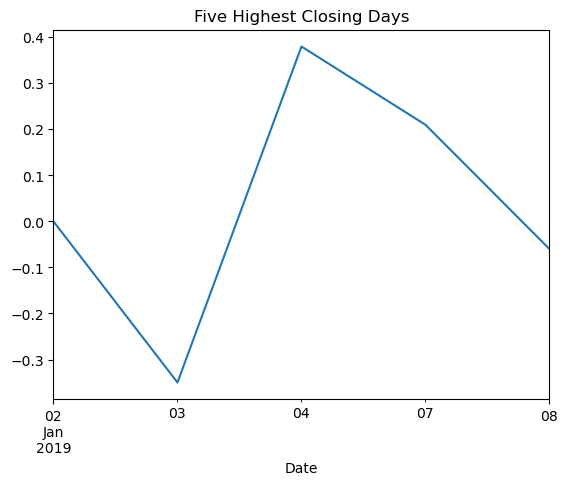

In [69]:
# Plot top 5 performing days
import matplotlib.pyplot as plt

stockData.head(5)['Daily Return'].plot(title='Five Highest Closing Days')

plt.show()

<AxesSubplot:xlabel='Date'>

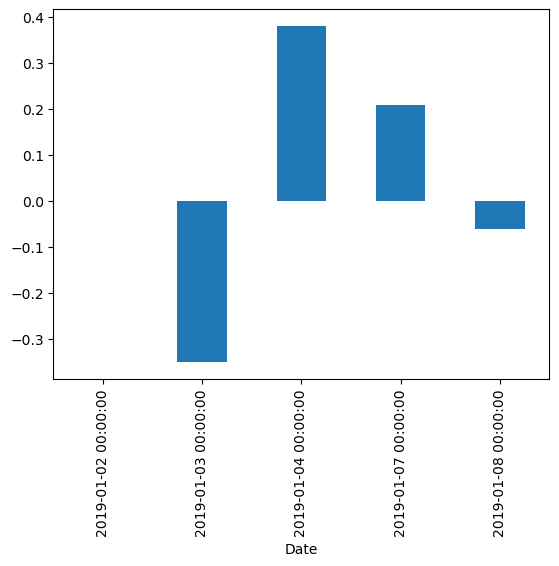

In [68]:
# Alternatively, visualizing the returns as a bar chart:
stockData.head(5)['Daily Return'].plot(kind='bar')
